# Install libraries:

In [1]:
#importing libraries
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from zipfile import ZipFile
import json
# -*- coding: utf-8 -*-

Mounted at /content/drive


In [ ]:
#importing processed brand names through NLP
brandsprocessed3 = pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/brandslistfinal_data.csv')
brandsprocessed=list(brandsprocessed3['0'])

#Model Section

#Supervised Models



**We ran Linear Regression and Random Forest Regression model.**

##READ DATA RUN FOR BRAND SET

In [ ]:
#read file form drive
brandmodeldf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/brandmodel_input.csv')

In [ ]:
#1. af=account followers from df
#2. pl=likes of all posts by the account
#3. nsbmp=Number of Sponsored Posts from df
#4. nc=total number of comments by account
#5. ne=total emojis from df4
#6. nh=total hashtags from df5
#7. nbmp= total brand mentioning posts
#8. acl=average caption length
#9.nm=number of media
#10. url = has url or not 0 or 1

#Follower growth fgr= (af1-af0)/duration in months  can we get this from the dataset we have
#popularity pgr= (pl+nc)/(nm*duration in months)

In [ ]:
#checking head
brandmodeldf.head()

,Brand,Influencer,tot_inf,pgr,af,afe,npos,bm,bc,ib,isb,posttweets,pretweets
0,delightedbydesserthummus,"['onceuponapumpkin', 'ourpotluckfamily', 'plan...",3,84571,47982,2612,1390,26.0,3.0,26.0,3.0,2.0,0.0
1,liketoknow.it,"['bellemeetsworld', '5feetoffashion', 'chowdow...",3789,206748236,3057208,1506,18984,170782.0,7869.0,14632.0,3789.0,0.0,40.0
2,jofamafashion,"['ianna27', 'skopljak', 'lauraa_drln', 'lauraa...",7,108220,16942,416,1221,66.0,8.0,49.0,7.0,10.0,6.0
3,opullenceparis,"['theivorydiary', 'theivorydiary', 'theivorydi...",5,429985,44553,1714,502,44.0,7.0,34.0,5.0,0.0,0.0
4,hellobody_it,"['enzagreco_', 'chechurodriguez_real', 'iana_9...",22,2247299,164530,173,872,193.0,24.0,152.0,22.0,0.0,0.0


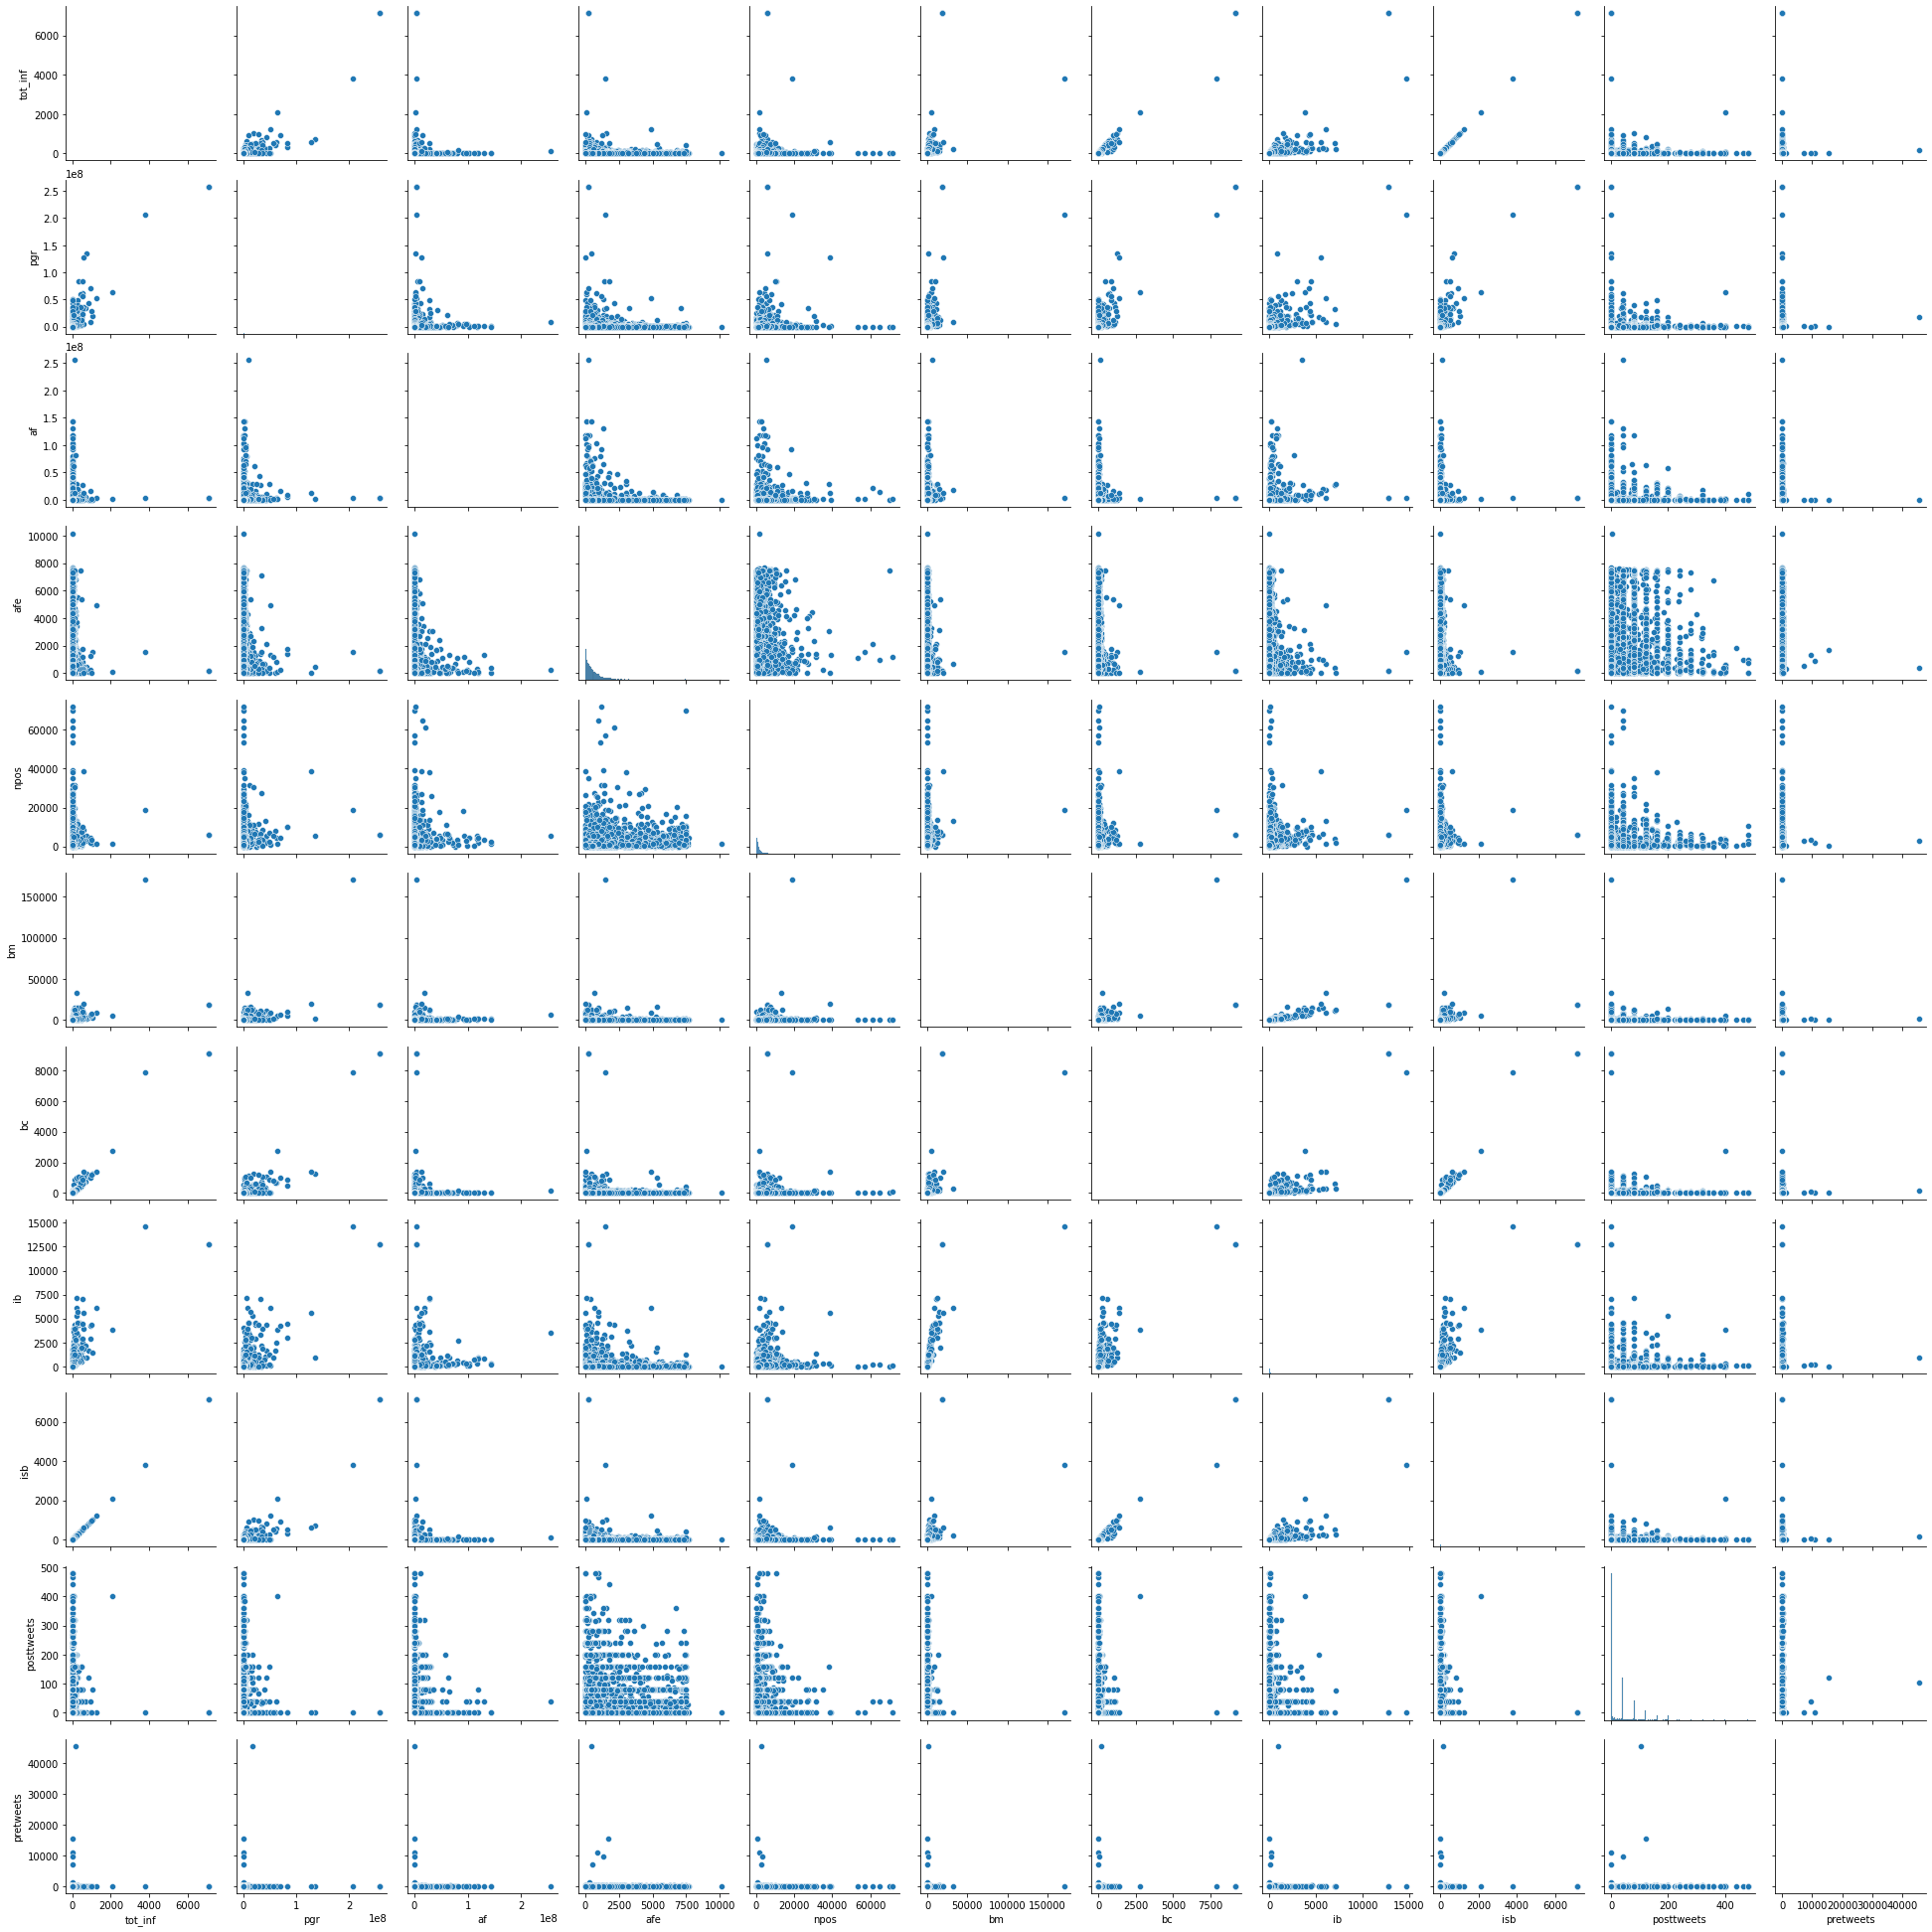

In [ ]:
#sns pairplot
import seaborn as sns
sns.pairplot(brandmodeldf)

In [ ]:
#1. af=account followers from df
#2. afe=account followees from df
#3. bc= total sponsored brand mentioning posts
#4. tot_inf=Total number of influencers
#5. bm = total number of brand mentioning posts
#6. ib = influencers mentioning brand
#7. isb = influencers sponsored mentioning brand
#8. pgr= total popularity pgr from all influencers employed by the brand

In [ ]:
#check the dataframe 
brandmodeldf

,Brand,Influencer,tot_inf,pgr,af,afe,npos,bm,bc,ib,isb,posttweets,pretweets
0,delightedbydesserthummus,"['onceuponapumpkin', 'ourpotluckfamily', 'plan...",3,84571,47982,2612,1390,26.0,3.0,26.0,3.0,2.0,0.0
1,liketoknow.it,"['bellemeetsworld', '5feetoffashion', 'chowdow...",3789,206748236,3057208,1506,18984,170782.0,7869.0,14632.0,3789.0,0.0,40.0
2,jofamafashion,"['ianna27', 'skopljak', 'lauraa_drln', 'lauraa...",7,108220,16942,416,1221,66.0,8.0,49.0,7.0,10.0,6.0
3,opullenceparis,"['theivorydiary', 'theivorydiary', 'theivorydi...",5,429985,44553,1714,502,44.0,7.0,34.0,5.0,0.0,0.0
4,hellobody_it,"['enzagreco_', 'chechurodriguez_real', 'iana_9...",22,2247299,164530,173,872,193.0,24.0,152.0,22.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18455,hahnemuehle_global,"['thepigeonletters', 'josilix', 'josilix', 'jo...",4,36362,18542,3803,500,20.0,5.0,12.0,4.0,0.0,0.0
18456,boardiesapparel,"['erosluca', 'sebastianocascio']",2,86250,8641,2756,966,21.0,3.0,19.0,2.0,0.0,0.0
18457,seersecrets,"['houseofdelish', 'avikaaa_']",2,3301,3715,409,312,6.0,2.0,6.0,2.0,0.0,20.0
18458,quornusa,"['lepetitchefsb', 'vegantraveleats']",2,16162,10223,530,536,8.0,2.0,8.0,2.0,0.0,0.0


In [ ]:
#import sklearn minmaxscaler to transform the dataframe
from sklearn.preprocessing import MinMaxScaler
modeldf3=brandmodeldf[['afe','npos','bc','bm','ib','isb','pgr']]
modeldf4=pd.DataFrame()
scaler = MinMaxScaler()
modeldf4[['afe','npos','bc','bm','ib','isb','pgr']] = scaler.fit_transform(modeldf3)
modeldf4

,afe,npos,bc,bm,ib,isb,pgr
0,0.256809,0.019297,0.000219,0.000146,0.001709,0.000281,0.000328
1,0.148068,0.263550,0.863382,1.000000,1.000000,0.531798,0.801574
2,0.040901,0.016951,0.000768,0.000381,0.003281,0.000842,0.000420
3,0.168518,0.006969,0.000658,0.000252,0.002255,0.000562,0.001667
4,0.017009,0.012106,0.002524,0.001124,0.010321,0.002948,0.008713
...,...,...,...,...,...,...,...
18455,0.373906,0.006941,0.000439,0.000111,0.000752,0.000421,0.000141
18456,0.270966,0.013411,0.000219,0.000117,0.001230,0.000140,0.000334
18457,0.040212,0.004331,0.000110,0.000029,0.000342,0.000140,0.000013
18458,0.052109,0.007441,0.000110,0.000041,0.000478,0.000140,0.000063


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab26366410>,
      dtype=object)

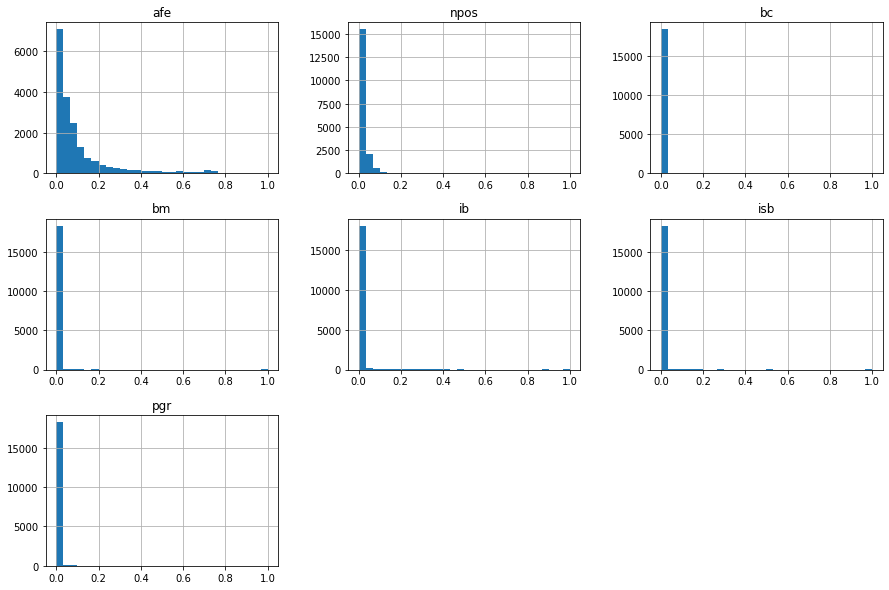

In [ ]:
#import matplotlib to create histograms of all the variables normalized
import matplotlib.pyplot as plt
modeldf4.hist(bins=30, figsize=(15, 10))

In [ ]:
#find correlation
corr=modeldf4.corr(method='spearman')
corr

,afe,npos,bc,bm,ib,isb,pgr
afe,1.000000,0.267220,-0.020925,-0.009316,-0.024344,-0.024160,-0.040238
npos,0.267220,1.000000,0.142621,0.407419,0.385995,0.137854,0.154082
bc,-0.020925,0.142621,1.000000,0.670850,0.679109,0.990311,0.707105
bm,-0.009316,0.407419,0.670850,1.000000,0.966279,0.670565,0.552676
ib,-0.024344,0.385995,0.679109,0.966279,1.000000,0.692902,0.578180
isb,-0.024160,0.137854,0.990311,0.670565,0.692902,1.000000,0.718469
pgr,-0.040238,0.154082,0.707105,0.552676,0.578180,0.718469,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


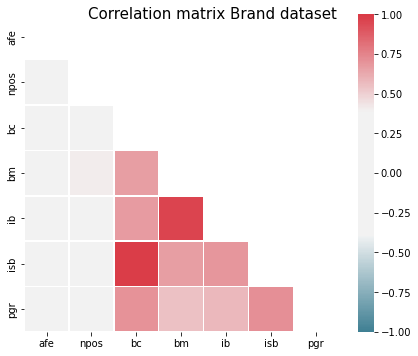

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# masking upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# using matplotlib plt
fig1, ax = plt.subplots(figsize=(6, 5))

# pallette
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# draw heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
#title
fig1.suptitle('Correlation matrix Brand dataset', fontsize=15)
#setting properties
ax.text(0.77, 0.2, '', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
#drawing heatmap
fig1.tight_layout()

In [ ]:
corr=brandmodeldf[['af','afe','npos','bc','bm','ib','isb','pgr','pretweets','posttweets']].corr(method='spearman')
corr

,af,afe,npos,bc,bm,ib,isb,pgr,pretweets,posttweets
af,1.000000,-0.023196,0.616203,0.212833,0.576696,0.575784,0.213426,0.272607,0.064900,0.071160
afe,-0.023196,1.000000,0.267220,-0.020925,-0.009316,-0.024344,-0.024160,-0.040238,-0.042007,-0.041094
npos,0.616203,0.267220,1.000000,0.142621,0.407419,0.385995,0.137854,0.154082,0.015925,0.026905
bc,0.212833,-0.020925,0.142621,1.000000,0.670850,0.679109,0.990311,0.707105,0.094549,0.074434
bm,0.576696,-0.009316,0.407419,0.670850,1.000000,0.966279,0.670565,0.552676,0.094130,0.077672
ib,0.575784,-0.024344,0.385995,0.679109,0.966279,1.000000,0.692902,0.578180,0.107760,0.090845
isb,0.213426,-0.024160,0.137854,0.990311,0.670565,0.692902,1.000000,0.718469,0.097443,0.077159
pgr,0.272607,-0.040238,0.154082,0.707105,0.552676,0.578180,0.718469,1.000000,0.088351,0.073660
pretweets,0.064900,-0.042007,0.015925,0.094549,0.094130,0.107760,0.097443,0.088351,1.000000,0.203267
posttweets,0.071160,-0.041094,0.026905,0.074434,0.077672,0.090845,0.077159,0.073660,0.203267,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


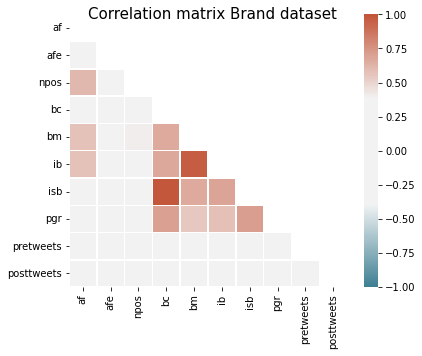

In [ ]:
import seaborn as sns
# masking upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# using matplotlib plt
fig2, ax = plt.subplots(figsize=(6, 5))

# pallette
cmap = sns.diverging_palette(220, 20, as_cmap=True, sep=100)

# draw heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
#title
fig2.suptitle('Correlation matrix Brand dataset', fontsize=15)
#setting properties
ax.text(0.80, 0.2, '', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
#drawing heatmap
fig2.tight_layout()

In [ ]:
#Normalizing account followees, number of posts and pgr values and use actual values for other variables
normdf=brandmodeldf.copy()
normdf['afe']=modeldf4['afe']
normdf['npos']=modeldf4['npos']
normdf['pgr']=modeldf4['pgr']

##RANDOM FOREST REGRESSION

###RANDOM FOREST REGRESSION WITHOUT FOLLOWERS FOR BRAND DATASET

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
#X&y dataset
X = brandmodeldf[['afe','npos','bc','bm','ib','isb']].values
y = brandmodeldf['pgr'].values

#split test and run
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,test_size=0.25, random_state=42)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(X_train.reshape(-1,6), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test.reshape(-1,6))
y_pred

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df
#PRINT METRICS
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
"Score of our model is %2.2f%%" % (regressor.score(X.reshape(-1,6), y) * 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Mean Absolute Error: 472621.74968430074
Mean Squared Error: 3632180449035.242
Root Mean Squared Error: 1905828.021893697


'Score of our model is 94.00%'

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
#using normalized dataset

X = normdf[['afe','npos','bc','bm','ib','isb']].values
y = normdf['pgr'].values
 
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=42)
 
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(X_train.reshape(-1,6), y_train.reshape(-1,1))
 
y_pred = regressor.predict(X_test.reshape(-1,6))
y_pred
 
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df
#PRINT METRICS
from sklearn import metrics
print("Score of our model is %2.2f%%" % (regressor.score(X.reshape(-1,6), y) * 100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score of our model is 93.46%
Mean Absolute Error: 0.0018511248829009336
Mean Squared Error: 6.40345777224391e-05
Root Mean Squared Error: 0.008002160815832127


## LINEAR REGRESSION

###Linear Regression statsmodels library for Brand Dataset



In [ ]:
#statsmodel library
import statsmodels.api as sm
X = brandmodeldf[['afe','npos','bc','bm','ib','isb']]
X = sm.add_constant(X)
#linear regression for actual values
mod = sm.OLS(brandmodeldf['pgr'], X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    pgr   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 1.537e+04
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:14:42   Log-Likelihood:            -2.9427e+05
No. Observations:               18460   AIC:                         5.886e+05
Df Residuals:                   18453   BIC:                         5.886e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.03e+04   2.04e+04     -2.468      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Linear Regression using some normalized values for followers, followees, popularity and actual values for the rest. This was done as a test

In [ ]:
#statsmodel library
import statsmodels.api as sm
X = normdf[['afe','npos','bc','bm','ib','isb']]
X = sm.add_constant(X)
#linear regression model
mod = sm.OLS(normdf['pgr'], X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    pgr   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 1.537e+04
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:17:53   Log-Likelihood:                 63264.
No. Observations:               18460   AIC:                        -1.265e+05
Df Residuals:                   18453   BIC:                        -1.265e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002    7.9e-05     -2.468      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


We can see here that the normalized values for number of posts, number of followees and popularity are shown here. We were going to add tweets number of tweets growth as a proxy for the follower growth. However since it did not provide good information we did not do any follower growth. Also in future pre and post follower data should be collected to incorporate it into the overall popularity.

###LINEAR REGRESSION WITHOUT FOLLOWERS FOR BRAND DATASET

In [ ]:
#import sklearn libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X = brandmodeldf[['afe','npos','bc','bm','ib','isb']].values
y = brandmodeldf['pgr'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,test_size=0.25, random_state=42)

# # Fitting Linear Regression to the dataset

model = LinearRegression()
model.fit(X_train.reshape(-1,6), y_train.reshape(-1,1))


y_pred = model.predict(X_test.reshape(-1,6))
y_pred

df2 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})


#Printing Results
result=pd.DataFrame(model.coef_.reshape(6,1), ['afe','npos','bc','bm','ib','isb'], columns = ['Coeff'])
print(result)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score of our model is %2.2f%%" % (model.score(X_test.reshape(-1,6), y_test) * 100))
print("R squared value of our model is " +str(r2_score(y_test, y_pred)))


             Coeff
afe     -38.800961
npos     54.351400
bc    25982.452476
bm     -228.078171
ib     2414.449919
isb     258.159501
Mean Absolute Error: 471438.1658101562
Mean Squared Error: 4171717965197.289
Root Mean Squared Error: 2042478.3879388515
Score of our model is 88.95%
R squared value of our model is 0.8894876001447247


In [2]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np


sklearn Linear Regression using Normalized values for followees, followers and poularity and straight values for other variables

[-9.94360879e-05]
             Coeff
afe  -1.530058e-03
npos  1.517882e-02
bc    1.007354e-04
bm   -8.842713e-07
ib    9.360952e-06
isb   1.000898e-06
Mean Absolute Error: 0.0018277910759605274
Mean Squared Error: 6.27073673339125e-05
Root Mean Squared Error: 0.007918798351638492
Score of our model is 88.95%
R squared value of our model is 0.8894876001447183


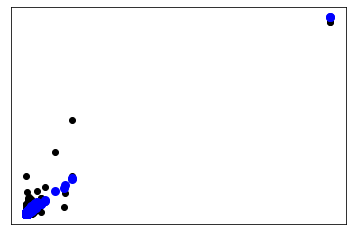

In [ ]:
#import libraries

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#import X&y
X = normdf[['afe','npos','bc','bm','ib','isb']].values
y = normdf['pgr'].values

#import library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,test_size=0.25,random_state=42)

model = LinearRegression()
model.fit(X_train.reshape(-1,6), y_train.reshape(-1,1))

y_pred = model.predict(X_test.reshape(-1,6))
y_pred
from sklearn import metrics
df2 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df2
print(model.intercept_)
result=pd.DataFrame(model.coef_.reshape(6,1), ['afe','npos','bc','bm','ib','isb'], columns = ['Coeff'])
print(result)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rsq=r2_score(y_test, y_pred)
print("Score of our model is %2.2f%%" % (model.score(X_test.reshape(-1,6), y_test) * 100))
print("R squared value of our model is " +str(r2_score(y_test, y_pred)))
#Scatter plot
plt.scatter(X_test.reshape(-1,6)[:,2],y_test, color="black")
plt.scatter(X_test.reshape(-1,6)[:,2], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

##Read Data Run Influencers Dataset

In [3]:
#read data for influencer dataset
modeldf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/model_input.csv')

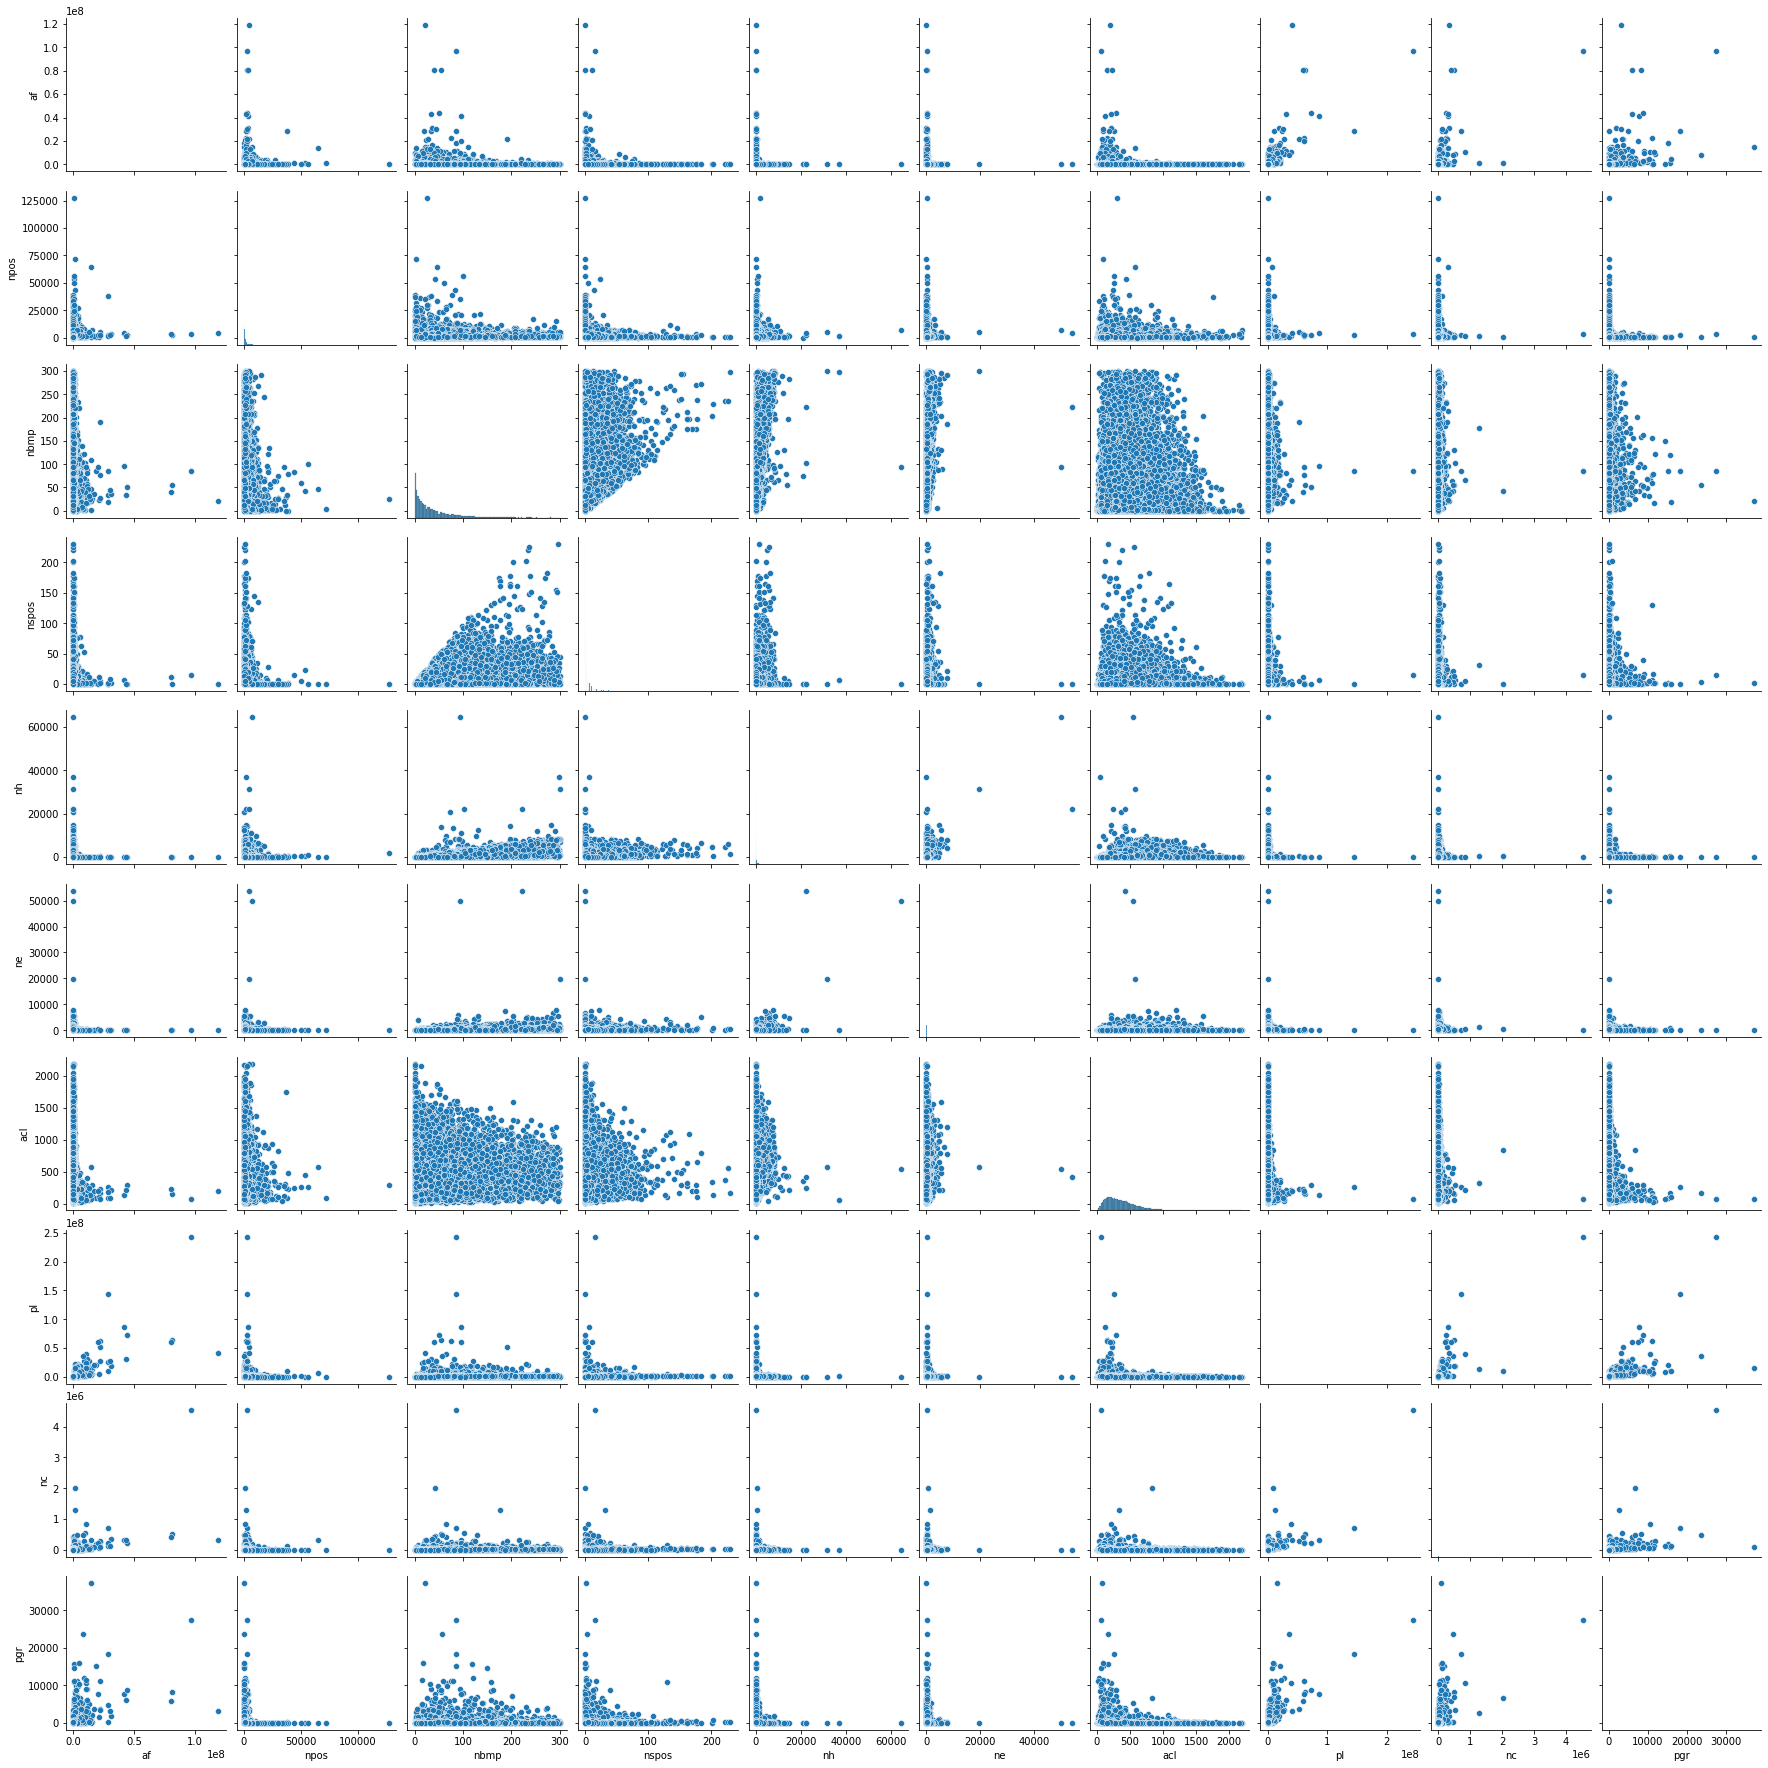

In [ ]:
#pairplot
import seaborn as sns
sns.pairplot(modeldf)

In [25]:
#correlation
corr=modeldf[['npos','ne','nh','nbmp','nspos','url','acl','pgr']].corr(method='spearman')
corr

,npos,ne,nh,nbmp,nspos,url,acl,pgr
npos,1.000000,0.174567,0.139530,0.232836,0.121390,0.064655,0.110737,0.076004
ne,0.174567,1.000000,0.638583,0.801548,0.433490,0.219391,0.318303,0.272006
nh,0.139530,0.638583,1.000000,0.732155,0.418075,0.180111,0.562192,0.117398
nbmp,0.232836,0.801548,0.732155,1.000000,0.562148,0.270277,0.204849,0.290353
nspos,0.121390,0.433490,0.418075,0.562148,1.000000,0.143670,0.165229,0.224155
url,0.064655,0.219391,0.180111,0.270277,0.143670,1.000000,0.015952,-0.657643
acl,0.110737,0.318303,0.562192,0.204849,0.165229,0.015952,1.000000,0.004141
pgr,0.076004,0.272006,0.117398,0.290353,0.224155,-0.657643,0.004141,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


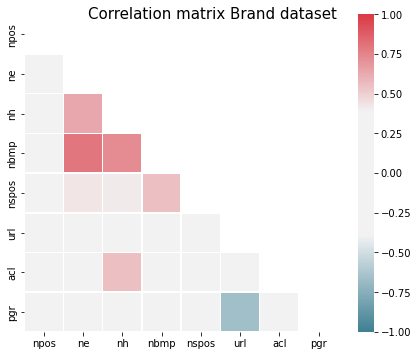

In [26]:
import seaborn as sns
# masking upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# using matplotlib plt
fig1, ax = plt.subplots(figsize=(6, 5))

# pallette
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# draw heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
#title
fig1.suptitle('Correlation matrix Brand dataset', fontsize=15)
#setting properties
ax.text(0.77, 0.2, '', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
#drawing heatmap
fig1.tight_layout()

In [ ]:
#1. af=account followers from df
#2. pl=likes of all posts by the account
#3. npos=Number of Posts from df
#4. nspos=Number of Sponsored Posts from df
#5. nc=total number of comments by account
#6. ne=total emojis from df4
#7. nh=total hashtags from df5
#8. nbmp= total brand mentioning posts
#9. acl=average caption length

#Follower growth fgr= (af1-af0)/duration in months  used tweets as a proxy for this
#popularity pgr= (pl+nc)/(npos*duration in months)

In [6]:
#Normalize data
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
#normalize values
modeldf1=modeldf[['npos','ne','nh','nbmp','nspos','url','acl','pgr']]
# modeldf1=pd.DataFrame(preprocessing.normalize(modeldf1))
# modeldf1=modeldf1.rename(columns={0:'af',1:'npos',2:'ne',3:'nh',4:'nbmp',5:'nspos',6:'url',7:'acl',8:'pgr'})
# modeldf1.head()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
modeldf1[['npos','ne','nh','nbmp','nspos','url','acl','pgr']] = scaler.fit_transform(modeldf1)
modeldf1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,npos,ne,nh,nbmp,nspos,url,acl,pgr
0,0.004079,0.000445,0.000248,0.036667,0.013043,0.036667,0.217999,2.363774e-07
1,0.010644,0.001020,0.000388,0.216667,0.021739,0.000000,0.067402,4.146453e-04
2,0.002949,0.002449,0.006531,0.033333,0.000000,0.043333,0.164959,1.169807e-07
3,0.009577,0.000000,0.000078,0.003333,0.004348,0.003333,0.070744,3.305977e-08
4,0.006895,0.000352,0.000124,0.040000,0.000000,0.036667,0.127910,4.684720e-07
...,...,...,...,...,...,...,...,...
38091,0.008071,0.000278,0.028653,0.443333,0.008696,0.353333,0.086770,1.155573e-05
38092,0.000753,0.002356,0.016320,0.133333,0.013043,0.133333,0.277999,6.384110e-07
38093,0.002824,0.000315,0.001039,0.043333,0.000000,0.046667,0.068853,4.716921e-07
38094,0.007083,0.001336,0.004452,0.106667,0.000000,0.000000,0.164851,9.063887e-06


In [16]:
#Normalizing account followees, number of posts and pgr values and use actual values for other variables
normdf1=modeldf.copy()
normdf1['acl']=modeldf1['acl']
normdf1['npos']=modeldf1['npos']
normdf1['pgr']=modeldf1['pgr']

###Random Forest Regression models Influencer dataset

In [18]:
#model just using more variables
#import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

X = normdf1[['acl','ne','nh','npos','url']].values
y = normdf1['pgr'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=101)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 250, random_state = 0)
regressor.fit(X_train.reshape(-1,5), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test.reshape(-1,5))
y_pred

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df
#PRINT METRICS
from sklearn import metrics
print("Score of our model is %2.2f%%" % (regressor.score(X.reshape(-1,5), y) * 100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score of our model is 79.76%
Mean Absolute Error: 0.0007367409537472303
Mean Squared Error: 1.1132213453117562e-05
Root Mean Squared Error: 0.0033364971831424586


In [9]:
#Without Normalization
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

X = modeldf[['acl','ne','nh','nbmp','nspos','url']].values
y = modeldf['pgr'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=101)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 250, random_state = 0)
regressor.fit(X_train.reshape(-1,6), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test.reshape(-1,6))
y_pred

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df
#PRINT METRICS
from sklearn import metrics
print("Score of our model is %2.2f%%" % (regressor.score(X.reshape(-1,6), y) * 100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Score of our model is 78.52%
Mean Absolute Error: 36499.54529662585
Mean Squared Error: 32263857319.811405
Root Mean Squared Error: 179621.4277858057


###Linear Regression Models Influencer dataset

In [23]:
#import sklearn libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X = modeldf[['npos','ne','nh','nbmp','nspos','url','acl']].values
y = modeldf['pgr'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,test_size=0.25, random_state=101)

# # Fitting Linear Regression to the dataset

model = LinearRegression()
model.fit(X_train.reshape(-1,7), y_train.reshape(-1,1))


y_pred = model.predict(X_test.reshape(-1,7))
y_pred

df2 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})


#Printing Results
result=pd.DataFrame(model.coef_.reshape(7,1), ['npos','ne','nh','nbmp','nspos','url','acl'], columns = ['Coeff'])
print(result)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score of our model is %2.2f%%" % (model.score(X_test.reshape(-1,7), y_test) * 100))
print("R squared value of our model is " +str(r2_score(y_test, y_pred)))

             Coeff
npos      4.337275
ne       29.980447
nh      -29.720415
nbmp   1475.386594
nspos  -451.978485
url   -1317.977661
acl     -53.704653
Mean Absolute Error: 41445.082322316
Mean Squared Error: 18843771605.27317
Root Mean Squared Error: 137272.61782771235
Score of our model is 7.33%
R squared value of our model is 0.07328290840278562


[0.00041603]
              Coeff
npos   1.142553e-02
ne     6.194667e-07
nh    -6.140938e-07
nbmp   3.048496e-05
nspos -9.338941e-06
url   -2.723252e-05
acl   -2.431275e-03
Mean Absolute Error: 0.000856353077684202
Mean Squared Error: 8.045027710375588e-06
Root Mean Squared Error: 0.0028363758055616655
Score of our model is 7.33%
R squared value of our model is 0.07328290840278573


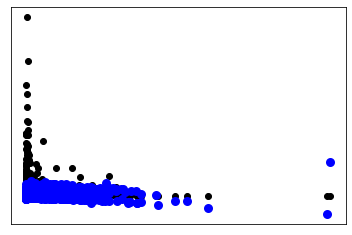

In [24]:
#import libraries

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#import X&y
X = normdf1[['npos','ne','nh','nbmp','nspos','url','acl']].values
y = normdf1['pgr'].values

#import library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,test_size=0.25,random_state=101)

model = LinearRegression()
model.fit(X_train.reshape(-1,7), y_train.reshape(-1,1))

y_pred = model.predict(X_test.reshape(-1,7))
y_pred
from sklearn import metrics
df2 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df2
print(model.intercept_)
result=pd.DataFrame(model.coef_.reshape(7,1), ['npos','ne','nh','nbmp','nspos','url','acl'], columns = ['Coeff'])
print(result)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rsq=r2_score(y_test, y_pred)
print("Score of our model is %2.2f%%" % (model.score(X_test.reshape(-1,7), y_test) * 100))
print("R squared value of our model is " +str(r2_score(y_test, y_pred)))
plt.scatter(X_test.reshape(-1,7)[:,2],y_test, color="black")
plt.scatter(X_test.reshape(-1,7)[:,2], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

We can see here that the normalized values for followers, number of posts, number of emojis, number of hashtags, number of brand posts, number of sponsored sposts and popularity are shown here.

#Find the effect of Sponsorship on the influencer posts by performing a t test to check if it was statistically significant. 

In [ ]:
#read data
modeldf.head()

,Account ID,Name,af,npos,Category,nbmp,nspos,nh,ne,acl,pl,nc,pgr,fgr
0,fodmap_friendly_eating,FODMAP Friendly Eating,11299.0,549.0,Creators & Celebrities,11.0,3.0,16,24,480.636364,1661,55,1.041894,2.0
1,paileaa,paige leanne,12615.0,1386.0,Creators & Celebrities,65.0,5.0,25,55,150.676923,58602,1601,14.478836,-40.0
2,a12team,A12 Team,1319.0,405.0,Food & Personal Goods,10.0,0.0,421,132,364.424242,1043,61,0.908642,4.0
3,ilbulgaro89,Andrea Paesetti,1547.0,1250.0,Creators & Celebrities,1.0,1.0,5,0,158.000000,23,1,0.006400,0.0
4,joililikoi,Joie Lee Ruggiero,7427.0,908.0,0,12.0,0.0,8,19,283.250000,3618,123,1.373348,0.0


In [ ]:
#import pingouin
import pingouin as pg

res = pg.ttest(modeldf[modeldf['spons']==1]['pgr'], modeldf[modeldf['spons']==0]['pgr'], correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.641187,38094,two-sided,2.087726e-26,"[44.01, 63.88]",0.110429,4.082e+22,1.0


Null Hypothesis states that sponsored and sponsored influencer posts are equal in terms of the popularity. Alternate Hypothesis is that they are different in terms of popularity. A results of t-test showed that the p-value 0 is less than 0.05 is statistically significant. It indicates strong evidence towards the alternate hypothesis, as there is less than a 5% probability the null is rejected. The results of this sample show that there is a significant difference between the popularity between sponsored and nonsponsored posts.

In [ ]:
!pip install pingouin

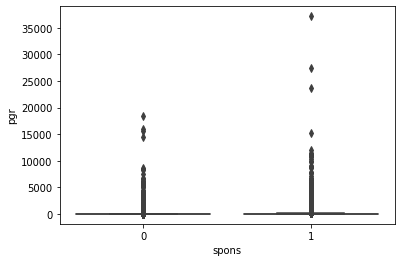

In [ ]:
#import seaborn
import seaborn as sns
sns.boxplot(x='spons', y='pgr', data=modeldf)

Checking Follower growth through tweets

In [ ]:
modeldf['spons']=modeldf['nspos'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
import pingouin as pg

res = pg.ttest(modeldf[modeldf['spons']==1]['fgr'], modeldf[modeldf['spons']==0]['fgr'], correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.839247,38094,two-sided,0.401336,"[-3.65, 9.11]",0.008709,0.017,0.133761


Null Hypothesis is that they are equal in terms of the popularity growth for sponsored and nonsponsored. Alternate Hypothesis is that they are different in terms of popularity growth for sponsored vs nonsponsored. A p-value 0.798 is not less than 0.05 is not statistically significant. It indicates strong evidence towards the null hypothesis, as there is more than a 5% probability the null is correct. The results of this sample show that there is no significant difference between the popularity growth between sponsored and nonsponsored posts.

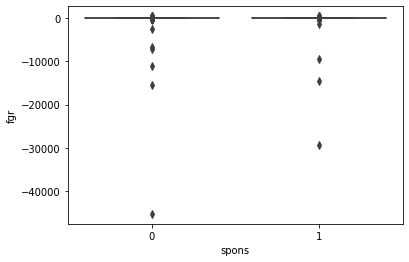

In [ ]:
#import seaborn
import seaborn as sns
#create boxplot of follower growth using twitter data as proxy to check if there is a difference.
sns.boxplot(x='spons', y='fgr', data=modeldf)